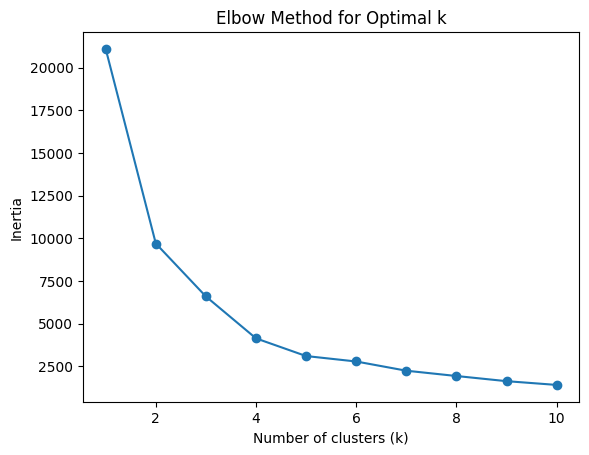

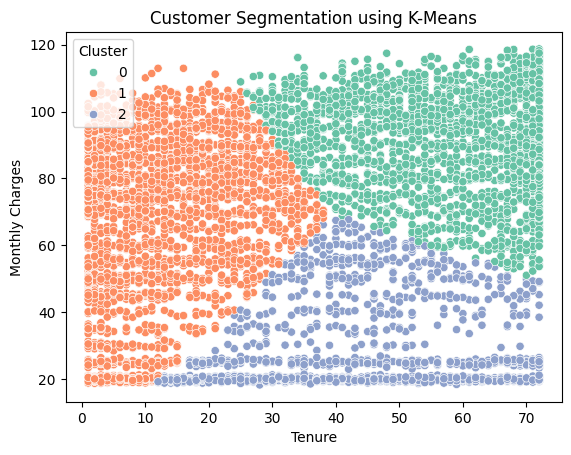

Cluster Centers:
       tenure  MonthlyCharges  TotalCharges
0  57.111061       91.600474   5222.652912
1  10.779869       62.504346    750.124567
2  44.518720       29.612934   1345.524472

Cluster Distribution:
Cluster
1    3346
0    2215
2    1471
Name: count, dtype: int64


In [3]:
# Assignment 8 – Unsupervised Learning (Clustering)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Load dataset
df = pd.read_csv('Customer-Churn-Cleaned.csv')

# Select numeric features for clustering
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with chosen k (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
sns.scatterplot(x=df['tenure'], y=df['MonthlyCharges'], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

# Display cluster centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster Centers:\n", centers)

# Count of customers in each cluster
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())
